# Exercises

---

## Exercise 1: structured and ustructured images
Write a function that outputs the number of PC you have to choose to retain a given percentage of explained variance.
Use this funtion on the  handwritten digit data, and plot the number of PC needed to retain a certain fraction of EVR, for a few vaules of EVR.

Compare this curve to the one you can obtain in unstructured images: either generate images with the same shape of our data or randomly permute the pixels in each image independenlty. How does the number of PC needed to retain a certain fraction of the variance in this case compare to the number needed for digit images?

## Exercise 2: cortical dynamics

Work with the cortical data we used in the lesson. Write some code that lets you easily chose a specific behavioural event from the `trial_data` dictionary (the recorded events are `CSp` for positive conditioned stimulus, `CSn` for negative conditioned stimulus and `licks` for lick events), one of the principal components, an onset time and and offset time, and plots the timecourse of this component in the selected period around the chosen event type.

Use this code to explore the data: how do different components behave? Do you notice any patterns? How would you test for the statistical significance of the effects that you see (if any)?

Original shape of voltage data: (96, 61, 29999)
Reshaped to: (5856, 29999) (pixels x timepoints)
PCA result shape: (29999, 10) (frames x PCs)
Estimated frame rate: 2.50 Hz


/tmp/ipython-input-3-1920754250.py:27: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  trial_data = pickle.load(f)


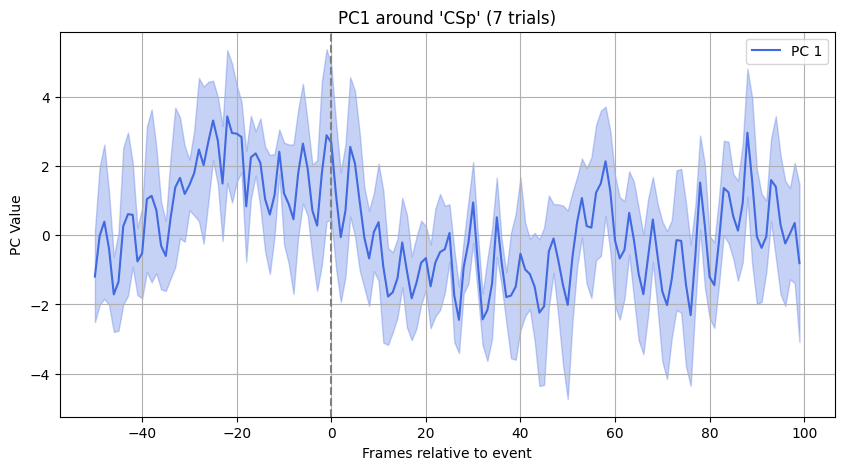

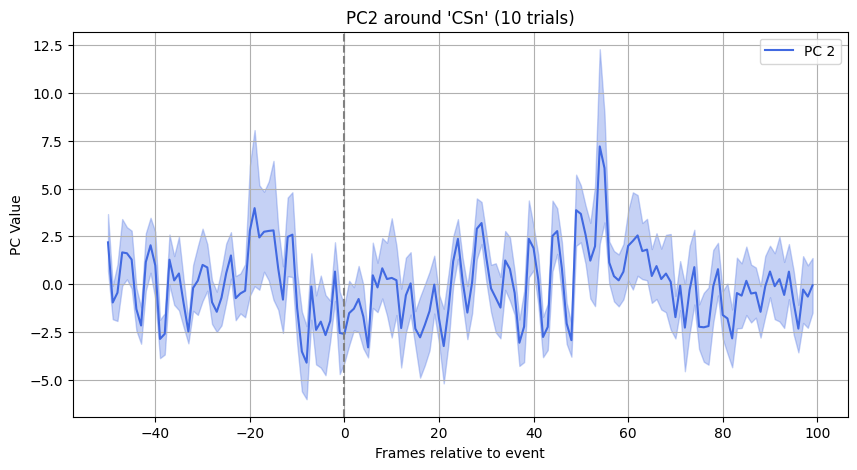

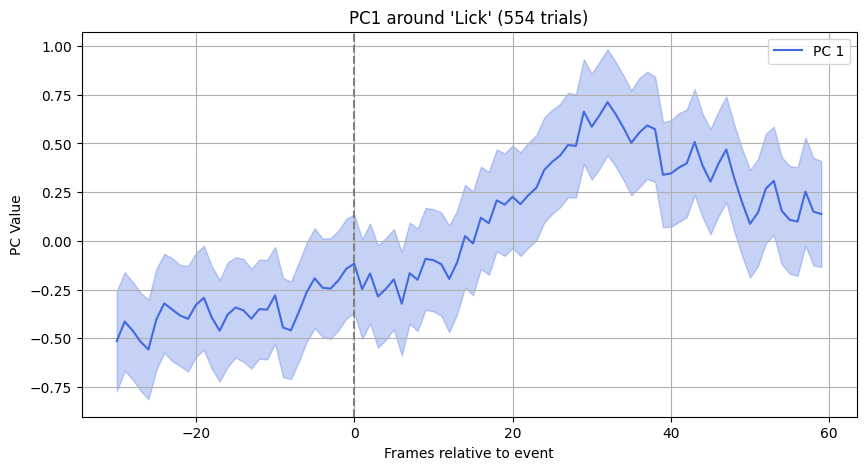

In [3]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load files from your Google Colab file system
voltage_path = "voltage_signal.npy"  # Update path if needed
behaviour_path = "behaviour.pickle"  # Path from upload

# Load voltage data
voltage_data = np.load(voltage_path)
print(f"Original shape of voltage data: {voltage_data.shape}")

# Reshape if needed (e.g., (n_pixels, n_timepoints))
if voltage_data.ndim == 3:
    voltage_data = voltage_data.reshape(voltage_data.shape[0]*voltage_data.shape[1], voltage_data.shape[2])
print(f"Reshaped to: {voltage_data.shape} (pixels x timepoints)")

# PCA
n_components = 10
pca = PCA(n_components=n_components)
voltage_pca = pca.fit_transform(voltage_data.T)  # Shape: (n_timepoints, n_components)
print(f"PCA result shape: {voltage_pca.shape} (frames x PCs)")

# Load behavior data
with open(behaviour_path, 'rb') as f:
    trial_data = pickle.load(f)

# Frame estimation
frame_times = trial_data['frames']
frame_diffs = np.diff(frame_times)
mean_frame_diff = frame_diffs.mean()
frame_rate = 1 / (mean_frame_diff / 1000)  # assuming times in ms
print(f"Estimated frame rate: {frame_rate:.2f} Hz")

# Function to plot around events
def plot_pc_around_event(event_name='Lick', pc_index=0, window=(-30, 70)):
    if event_name not in trial_data:
        print(f"Event '{event_name}' not found. Available keys: {list(trial_data.keys())}")
        return

    event_times = trial_data[event_name]
    frames = trial_data['frames']
    time_to_frame = lambda t: np.searchsorted(frames, t)

    aligned_traces = []
    valid_event_times = []

    for t in event_times:
        center_idx = time_to_frame(t)
        start_idx = center_idx + window[0]
        end_idx = center_idx + window[1]
        if 0 <= start_idx < voltage_pca.shape[0] and end_idx < voltage_pca.shape[0]:
            trace = voltage_pca[start_idx:end_idx, pc_index]
            aligned_traces.append(trace)
            valid_event_times.append(t)

    if not aligned_traces:
        print(f"No valid trials found for event '{event_name}' in window {window}.")
        return

    aligned_traces = np.stack(aligned_traces)
    mean_trace = aligned_traces.mean(axis=0)
    sem_trace = aligned_traces.std(axis=0) / np.sqrt(len(aligned_traces))

    time_axis = np.arange(window[0], window[1])
    plt.figure(figsize=(10, 5))
    plt.plot(time_axis, mean_trace, label=f"PC {pc_index+1}", color='royalblue')
    plt.fill_between(time_axis, mean_trace - sem_trace, mean_trace + sem_trace, alpha=0.3, color='royalblue')
    plt.axvline(0, color='gray', linestyle='--')
    plt.title(f"PC{pc_index+1} around '{event_name}' ({len(valid_event_times)} trials)")
    plt.xlabel("Frames relative to event")
    plt.ylabel("PC Value")
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage
plot_pc_around_event(event_name='CSp', pc_index=0, window=(-50, 100))
plot_pc_around_event(event_name='CSn', pc_index=1, window=(-50, 100))
plot_pc_around_event(event_name='Lick', pc_index=0, window=(-30, 60))


## Exercise 3: nonlinear dimensionality reduction

Using the MNIST digit dataset, explore the effect of hyperparameters on the result of nonlinear dimensionality reduction methods.

- Change the `perplexity` and `exageration` parameters in `TNSE` (one at a time). Graphically compare the results of different values.
- Change the neighbourhood size in `Isomap` (set by the parameter `n_neighbors`), and visualize how the results change.

Finally, try to apply one or more of these methods to the cortical data we used in the lessons. How do the data look in two dimensions? Do any cluster seem to appear? Are they robust with respect to hyperparameter choice?

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarnin

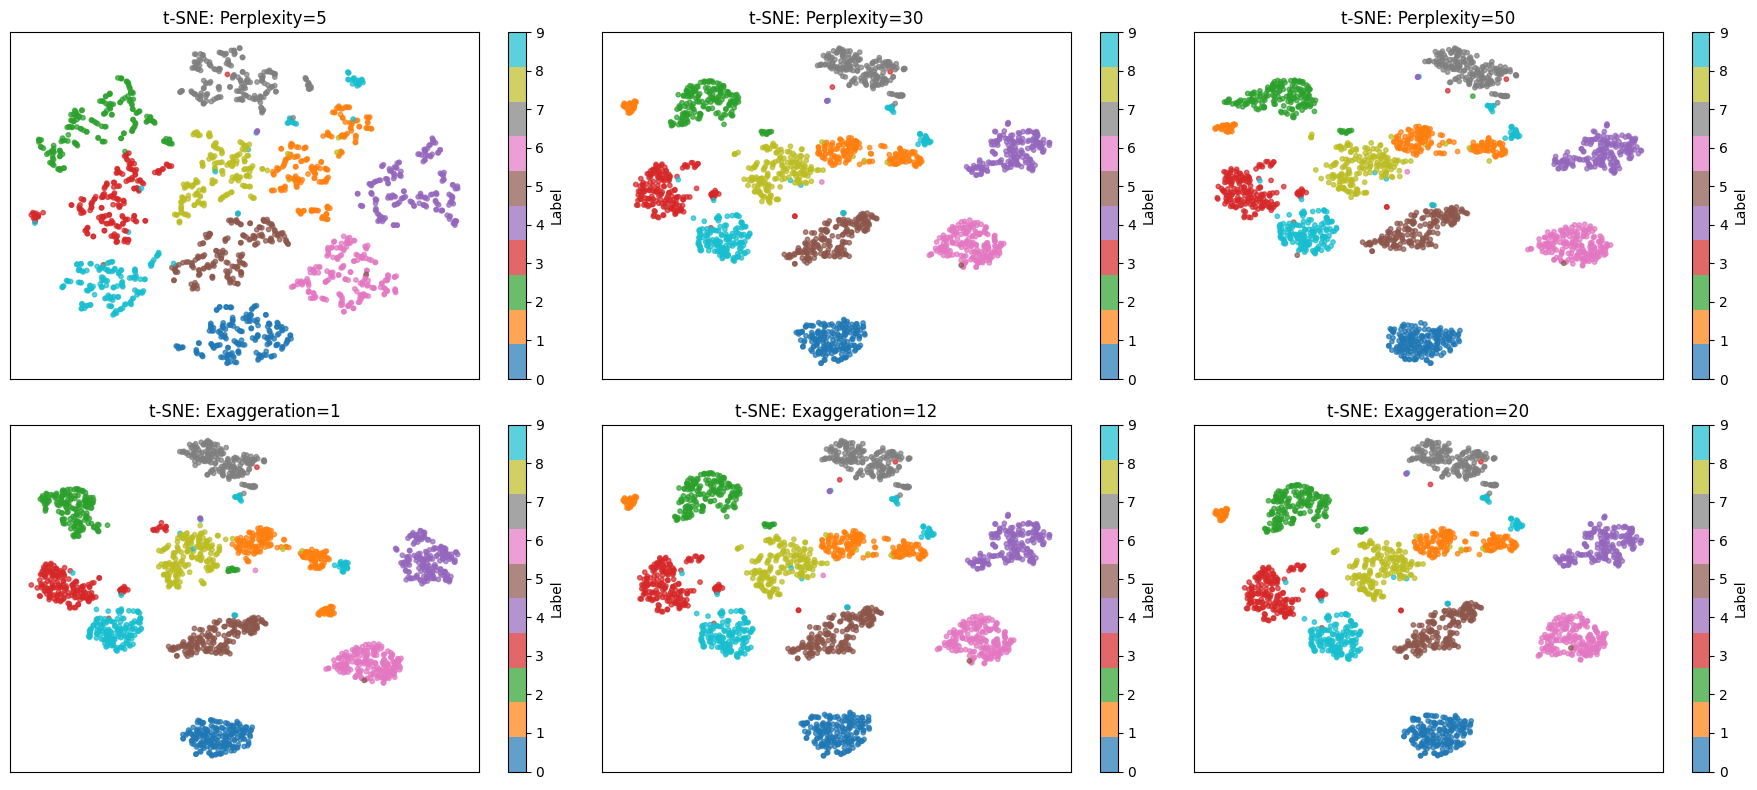

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_isomap.py:384: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


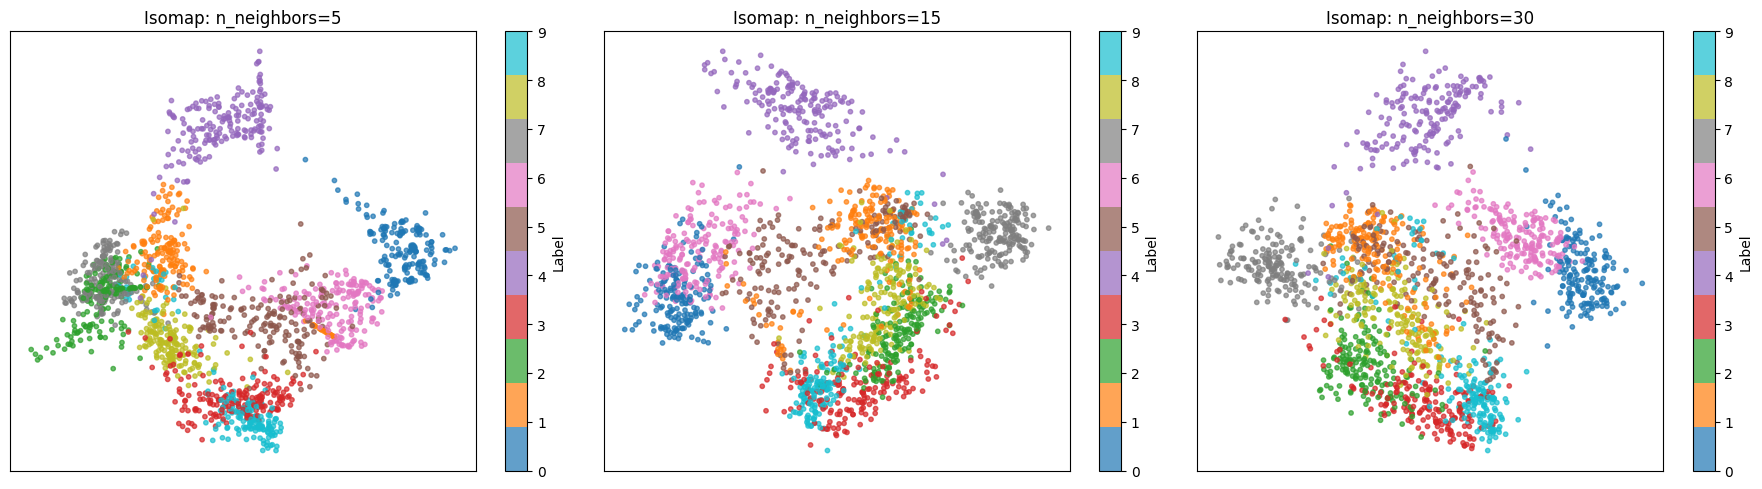

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


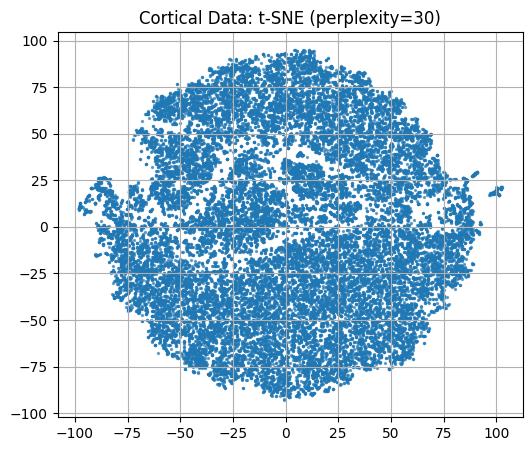

In [ ]:
# Install required packages
!pip install scikit-learn matplotlib seaborn --quiet

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE, Isomap

# Utility to plot 2D embeddings
def plot_embedding(X, y=None, title="", ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 5))
    sc = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='tab10', s=10, alpha=0.7)
    if y is not None:
        plt.colorbar(sc, ax=ax, label='Label')
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

# PART 1: MNIST digits & hyperparameter sweeps
digits = load_digits()
X, y = digits.data, digits.target

# t-SNE sweep
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
perplexities = [5, 30, 50]
for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=1000, learning_rate='auto')
    X_tsne = tsne.fit_transform(X)
    plot_embedding(X_tsne, y, f"t-SNE: Perplexity={perplexity}", ax=axes[0, i])

exaggerations = [1, 12, 20]
for i, exaggeration in enumerate(exaggerations):
    tsne = TSNE(n_components=2, perplexity=30, early_exaggeration=exaggeration, n_iter=1000, learning_rate='auto')
    X_tsne = tsne.fit_transform(X)
    plot_embedding(X_tsne, y, f"t-SNE: Exaggeration={exaggeration}", ax=axes[1, i])
plt.tight_layout()
plt.show()

# Isomap sweep
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
neighbors = [5, 15, 30]
for i, n in enumerate(neighbors):
    iso = Isomap(n_neighbors=n, n_components=2)
    X_iso = iso.fit_transform(X)
    plot_embedding(X_iso, y, f"Isomap: n_neighbors={n}", ax=axes[i])
plt.tight_layout()
plt.show()

# PART 2: Apply to cortical voltage PCA data

# Use only top N PCs to reduce computation
top_pcs = voltage_pca[:, :10]

# Try t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000)
voltage_tsne = tsne.fit_transform(top_pcs)

plt.figure(figsize=(6, 5))
plt.scatter(voltage_tsne[:, 0], voltage_tsne[:, 1], s=2, alpha=0.6)
plt.title("Cortical Data: t-SNE (perplexity=30)")
plt.grid(True)
plt.show()

# Try Isomap
iso = Isomap(n_neighbors=10, n_components=2)
voltage_iso = iso.fit_transform(top_pcs)

plt.figure(figsize=(6, 5))
plt.scatter(voltage_iso[:, 0], voltage_iso[:, 1], s=2, alpha=0.6)
plt.title("Cortical Data: Isomap (n_neighbors=10)")
plt.grid(True)
plt.show()
